<a href="https://colab.research.google.com/github/mnJ00/Data/blob/main/02_01_Artificial_Neural_Network(%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8)_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02_01 Artificial_Neural Network(예측모델)**



## 1. 기본 Pakage 설정 및 데이터 불러오기

In [ ]:
##한글 폰트 인식

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,834 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [ ]:
## 1. 기본
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## 2. 데이터 가져오기
import pandas as pd

## 3. 데이터 전처리
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder


## 4. 훈련/테스트용 데이터 분리
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # 불균형 데이터 처리

## 5. 모델 구축
from sklearn.neural_network import MLPRegressor
##from sklearn.neural_network import MLPClassifier

## 6.모델 검정
# 정오분류표, ROC,AUC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

## 7.최적화
from sklearn.model_selection import GridSearchCV

In [ ]:
## 한글 인식

plt.rc("font", family="NanumBarunGothic")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
train.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


In [ ]:
train.columns

Index(['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 데이터 전처리

### 3. 1. 필요없는 변수 제거

In [ ]:
train = train.drop(['ID'], axis =1)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,103,60,33,192,24.0,0.966,33,0
1,10,133,68,0,0,27.0,0.245,36,0
2,4,112,78,40,0,39.4,0.236,38,0
3,1,119,88,41,170,45.3,0.507,26,0
4,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...
647,1,91,64,24,0,29.2,0.192,21,0
648,10,122,68,0,0,31.2,0.258,41,0
649,8,84,74,31,0,38.3,0.457,39,0
650,2,81,72,15,76,30.1,0.547,25,0


### 3.2. 범주형 변수처리

In [ ]:
train["Outcome"] = train["Outcome"].replace([1,0], ["양성", "음성"])
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4,103,60,33,192,24.0,0.966,33,음성
1,10,133,68,0,0,27.0,0.245,36,음성
2,4,112,78,40,0,39.4,0.236,38,음성
3,1,119,88,41,170,45.3,0.507,26,음성
4,1,114,66,36,200,38.1,0.289,21,음성


## 4. 데이터 탐색

### 4.0 데이터구조 살펴보기

In [ ]:
train.shape

(652, 9)

### 4. 1. EDA데이터 탐색


In [ ]:
## 수치형 변수
train.describe().round(2)##뒤에.T붙이면 가로세로 바꿈

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,652.00,652.00,652.00,652.00,652.00,652.00,652.00,652.00
mean,3.92,120.95,68.90,20.44,80.88,31.95,0.47,33.51
std,3.33,31.99,19.18,15.92,117.75,7.46,0.33,11.82
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,64.00,0.00,0.00,27.40,0.24,24.00
50%,3.00,117.00,72.00,23.00,34.00,32.00,0.36,29.50
75%,6.00,142.00,80.00,32.00,126.00,36.42,0.61,41.00
max,15.00,199.00,114.00,99.00,846.00,57.30,2.33,81.00


In [ ]:
## 범주형 변수
catergorical_features = ["Outcome"]

for col in catergorical_features:
  cat = train[col].value_counts()
  print(cat)

음성    424
양성    228
Name: Outcome, dtype: int64


### 4.2. 그래프 그리기


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
/usr/local

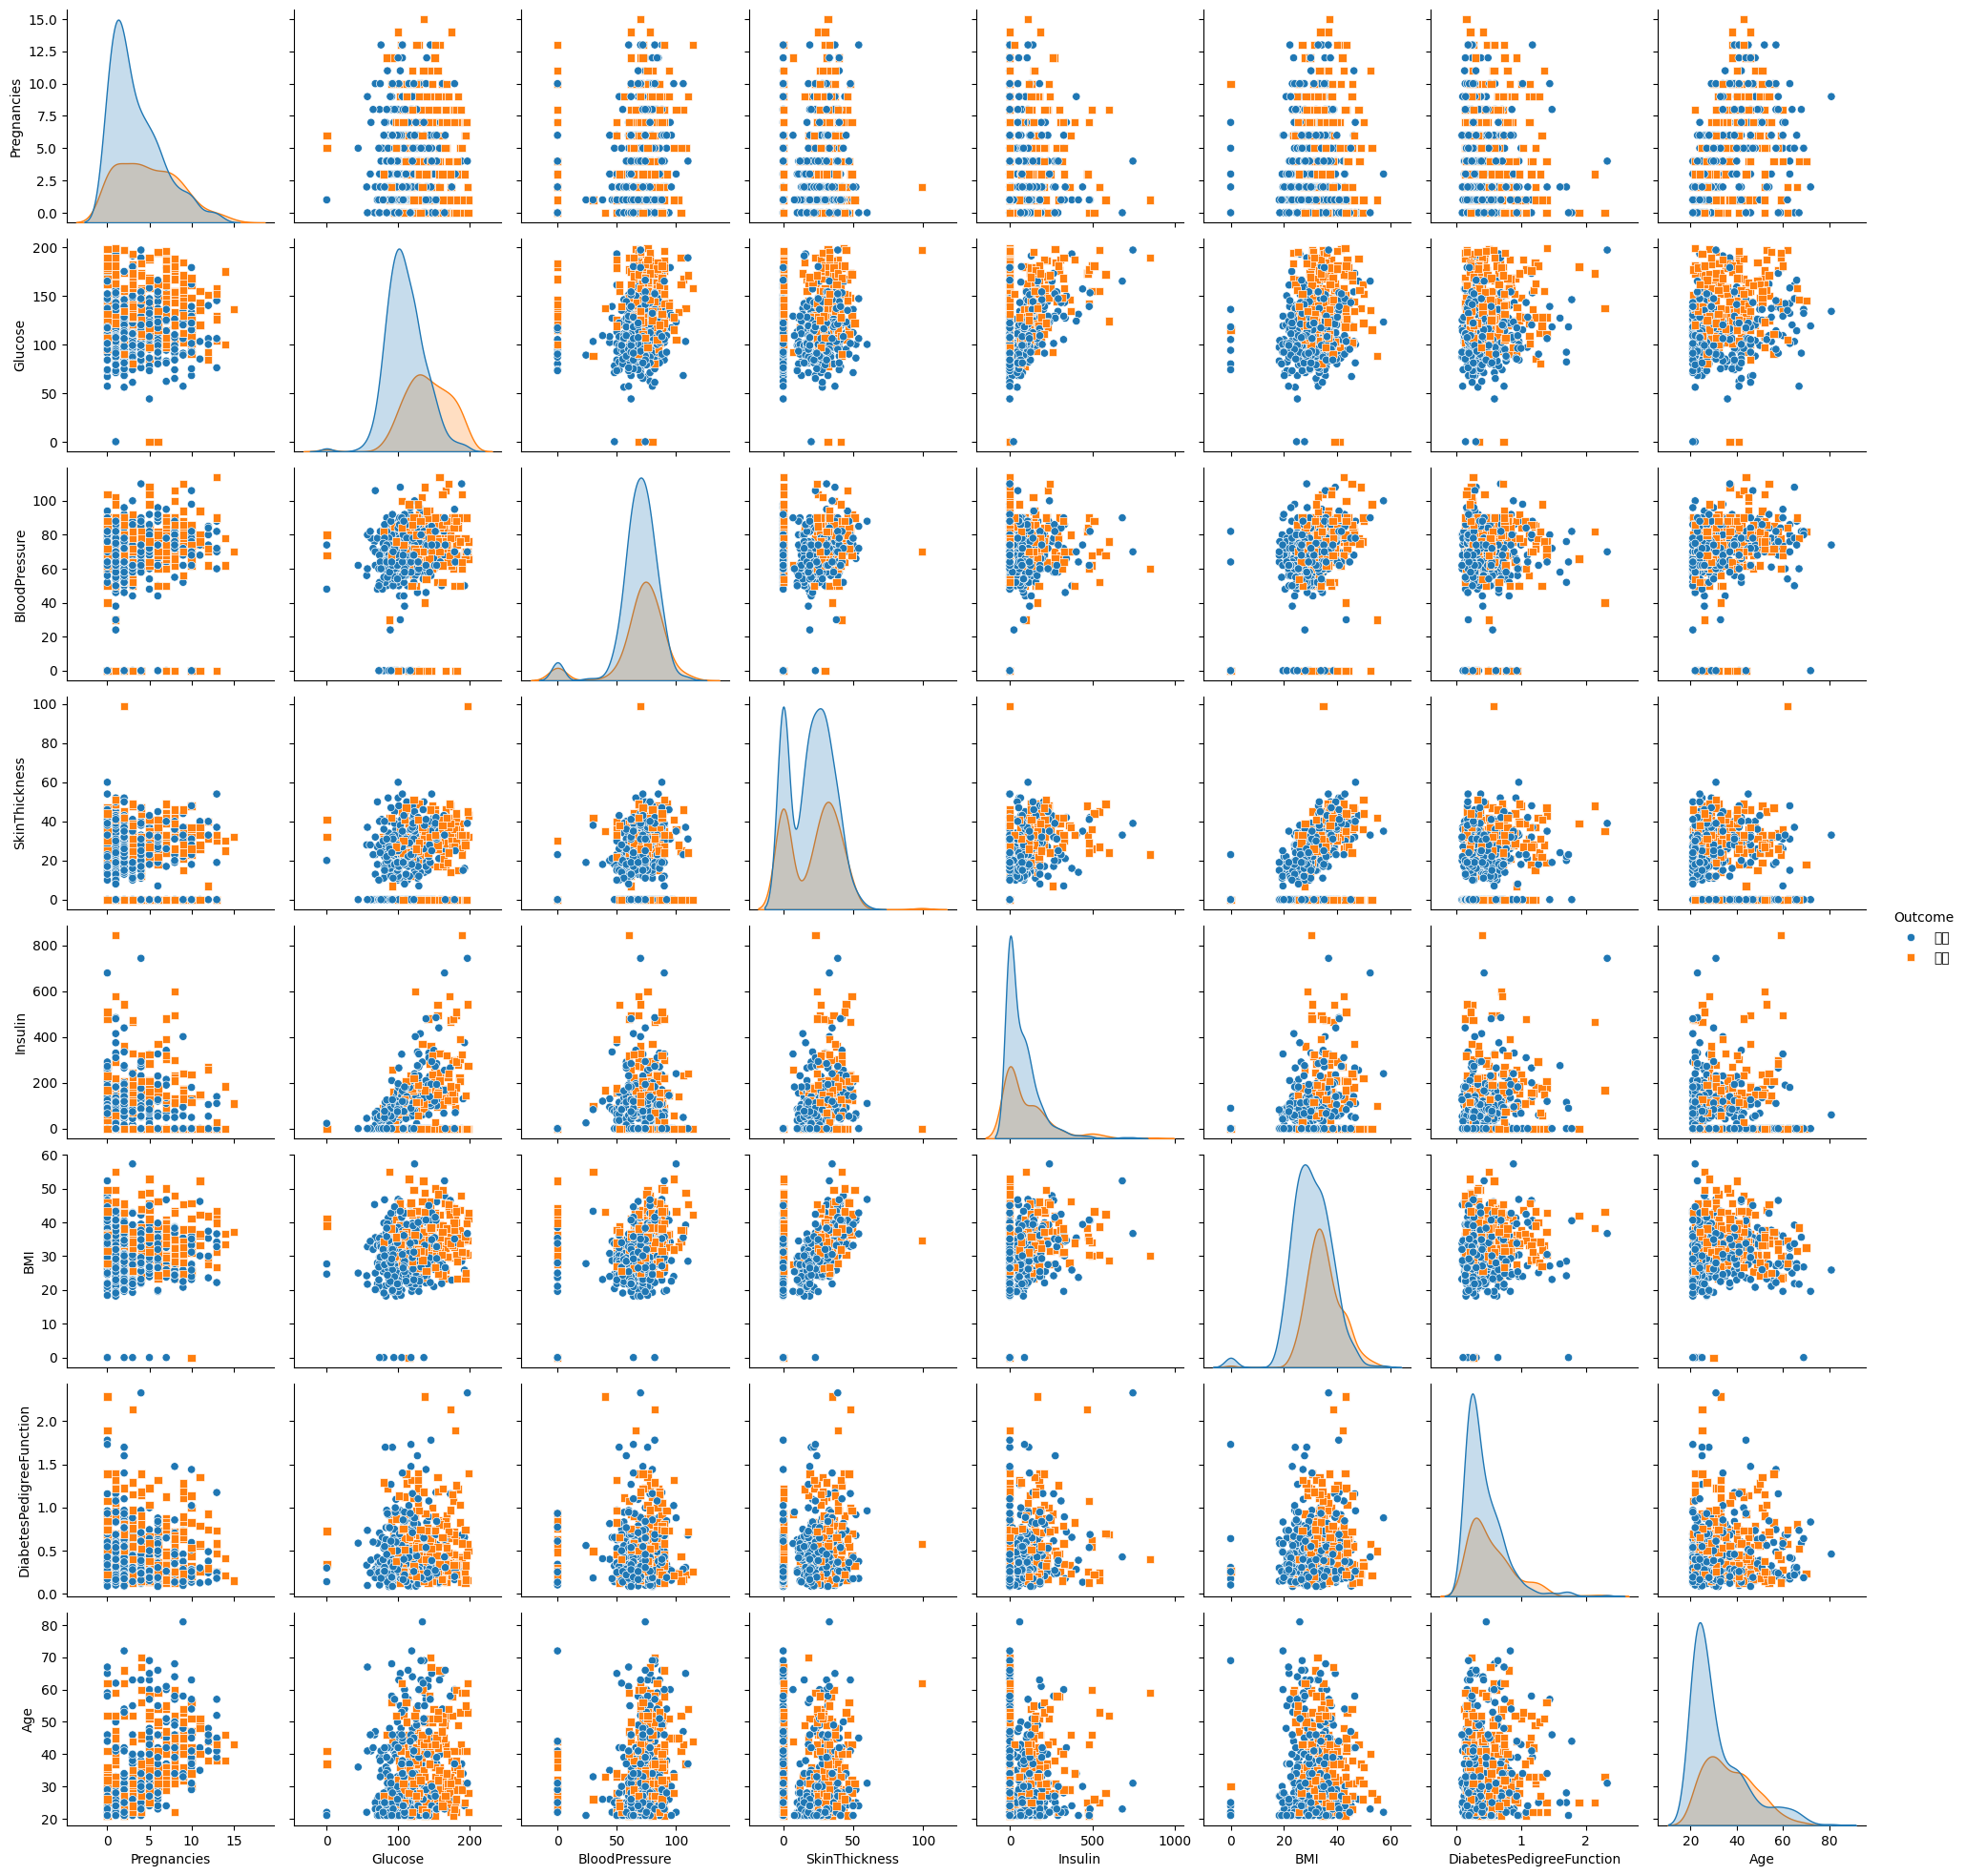

In [ ]:
# 수치형 변수
g = sns.pairplot(train,
                 hue = "Outcome",
                 markers = ["o", "s"])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


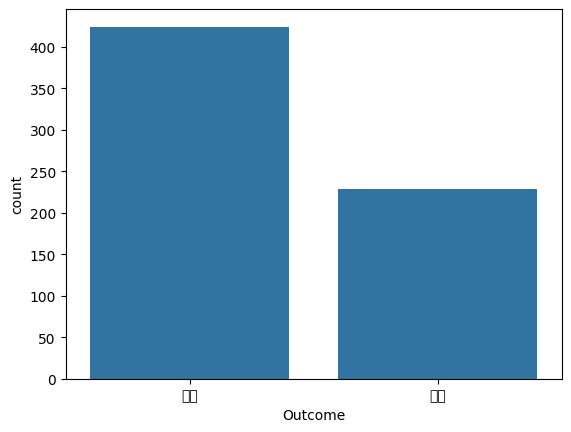

In [ ]:
# 범주형 자료 그래프

categorical_features = ["Outcome"]

for col in categorical_features:
    sns.countplot(x=col, data=train)
    plt.show()

### 4.3 base accuracy

In [ ]:
train["Outcome"].value_counts()

음성    424
양성    228
Name: Outcome, dtype: int64

In [ ]:
train["Outcome"].value_counts()/train.shape[0]

음성    0.650307
양성    0.349693
Name: Outcome, dtype: float64

##5. 훈련/테스트용 데이터 분할

### 5. 1. data(X), target(y)으로 분리

In [ ]:
## X값 추출
X = train.drop(["Outcome"], axis =1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,103,60,33,192,24.0,0.966,33
1,10,133,68,0,0,27.0,0.245,36
2,4,112,78,40,0,39.4,0.236,38
3,1,119,88,41,170,45.3,0.507,26
4,1,114,66,36,200,38.1,0.289,21


In [ ]:
y = train["Outcome"]
y.head()

0    음성
1    음성
2    음성
3    음성
4    음성
Name: Outcome, dtype: object

In [ ]:
# y값 배열처리

class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,

### 5.2. 훈련/테스트용으로 분리

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size=0.3,
                                                  random_state=1,
                                                  stratify=y) # y값 비율에 따라 처리

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 450 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               456 non-null    int64  
 1   Glucose                   456 non-null    int64  
 2   BloodPressure             456 non-null    int64  
 3   SkinThickness             456 non-null    int64  
 4   Insulin                   456 non-null    int64  
 5   BMI                       456 non-null    float64
 6   DiabetesPedigreeFunction  456 non-null    float64
 7   Age                       456 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.1 KB


In [ ]:
X_test.shape

(196, 8)

In [ ]:
y_train.shape

(456,)

In [ ]:
y_train = pd.Series(y_train)
y_train.head()

0    1
1    1
2    1
3    0
4    1
dtype: int64

In [ ]:
np.bincount(y_test)

array([ 69, 127])

## 6. pipeline으로 전처리

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 6. 1.preprocessing

In [ ]:
## pipeline세팅
## 수치형 자료(표준화)
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

numeric_transformer = Pipeline(
    steps  = [
        ("imputer", SimpleImputer(strategy="mean")), #누락된 값 평균처리
        ("scaler", StandardScaler()) #
    ]
)

## 범주형 변수(원핫인코딩)

catergorical_features = []

catergorical_transformer = Pipeline(
    steps  = [
        ("imputer", SimpleImputer(strategy="constant",
                                  fill_value = "missing")), #누락된 값 상수처리
        ("scaler", OneHotEncoder(handle_unknown = "ignore"))
            ]
)

preprocessor = ColumnTransformer(
    transformers = [("num", numeric_transformer, numeric_features),
                    ("cat", catergorical_transformer, catergorical_features)
                    ]
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=('num',
                                Pipeline(steps=[('imputer', SimpleImputer()),
                                                ('scaler', StandardScaler())]),
                                ['Pregnancies', 'Glucose', 'BloodPressure',
                                 'SkinThickness', 'Insulin', 'BMI',
                                 'DiabetesPedigreeFunction', 'Age']))

### 6. 2. 데이터 전처리 결과 확인

In [ ]:
pd.DataFrame(numeric_transformer.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7
0,-0.581361,1.200420,1.099771,-1.328968,-0.678951,-0.099136,1.134400,2.724790
1,-1.157666,-0.511592,-0.258588,1.210264,0.515643,1.256631,-0.907732,-1.002892
2,-0.869513,-0.673102,-0.154099,0.467074,0.969925,-0.044357,-0.032071,0.691509
3,-0.869513,1.652649,-0.049609,1.705724,4.191964,1.379883,0.801584,-0.494572
4,-0.005055,2.201785,2.144663,0.590939,-0.678951,-0.523669,0.730497,0.267909


##7.모델만들기(모델 설정)
 * 예측모델 : 00_reg
 * 분류모델 : 00_clf



### 7. 1. pipieline으로 모델 연결


In [ ]:
from sklearn import linear_model

from sklearn.linear_model import LinearRegression


lr_pipe = Pipeline(
    steps =[
        ("smote", SMOTE(sampling_strategy =0.75)),
        ("preprocessor", preprocessor),#불균형 자료 처리
        ("lr_clf", LogisticRegression())
    ]
)

lr_pipe

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.75)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('lr_clf', LogisticRegression())])

### 7.2. 하이퍼파라미터 세팅

In [ ]:
lr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'preprocessor', 'lr_clf', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor

In [ ]:
lr_grid = {
    'preprocessor__num__scaler__with_mean': [True, False],
    'preprocessor__num__scaler__with_std': [True, False],
    'lr_clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr_clf__penalty': ['l1', 'l2'],
}

lr_grid

{'preprocessor__num__scaler__with_mean': [True, False],
 'preprocessor__num__scaler__with_std': [True, False],
 'lr_clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'lr_clf__penalty': ['l1', 'l2']}

### 7.3. 하이퍼파라미터 그리드 세팅

In [ ]:
lr_gs = GridSearchCV(estimator=lr_pipe,
                     param_grid=lr_grid,
                     scoring="roc_auc",                   # 수정
                     cv = 10,
                     n_jobs = -1,
                     verbose = 10,
                     return_train_score= True)


In [ ]:
lr_gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.75)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pregnancies',
                                                                          'Glucose',
                                                                          'BloodPressure',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imp...
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('lr_clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr_clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'lr_clf__penalty': ['l1', 'l2'],
                         'preprocessor__num__scaler__with_mean': [True, False],
                         'preprocessor__num__scaler__with_std': [True, False]},
             return_train_score=True, scoring='roc_auc', verbose=10)

## 8. 모델 훈련(모델 학습)

### 8.1. 모델 훈련

In [ ]:
lr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.75)),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pregnancies',
                                                                          'Glucose',
                                                                          'BloodPressure',
                                                                          'SkinThickness',
                                                                          'Insulin',
                                                                          'BMI',
                                                                          'DiabetesPedigreeFunction',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imp...
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('lr_clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr_clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'lr_clf__penalty': ['l1', 'l2'],
                         'preprocessor__num__scaler__with_mean': [True, False],
                         'preprocessor__num__scaler__with_std': [True, False]},
             return_train_score=True, scoring='roc_auc', verbose=10)

### 8.2 검증곡선으로 튜닝 결과 확인

In [ ]:
lr_gs.cv_results_

{'mean_fit_time': array([0.02423871, 0.02485981, 0.02171502, 0.02063925, 0.02762349,
        0.03541503, 0.02993262, 0.05515294, 0.02212341, 0.02180753,
        0.02149665, 0.02148194, 0.02548366, 0.03957696, 0.03301158,
        0.05397797, 0.01918378, 0.02140815, 0.02394989, 0.01859541,
        0.03402984, 0.06100638, 0.05547907, 0.08352776, 0.04094262,
        0.03154068, 0.03229246, 0.03174613, 0.05310616, 0.08094158,
        0.05849233, 0.08227739, 0.0431103 , 0.03664742, 0.03603182,
        0.037079  , 0.04188442, 0.06079147, 0.03110409, 0.04979274,
        0.02173581, 0.02128019, 0.01982803, 0.02092109, 0.02364776,
        0.04155409, 0.03249948, 0.04529114]),
 'std_fit_time': array([0.00502389, 0.00719344, 0.00474592, 0.00220006, 0.00604199,
        0.00399591, 0.00730573, 0.00631658, 0.00342345, 0.00648506,
        0.00637714, 0.00651928, 0.00680762, 0.00352026, 0.01372006,
        0.00757636, 0.00154593, 0.00672665, 0.00726571, 0.0007673 ,
        0.01097615, 0.01767868, 0.012

In [ ]:
##분석 결과를 표로 정리

results_df = pd.DataFrame(lr_gs.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
39,"{'lr_clf__C': 10, 'lr_clf__penalty': 'l2', 'pr...",1,0.834651,0.044896
20,"{'lr_clf__C': 0.1, 'lr_clf__penalty': 'l2', 'p...",2,0.831798,0.047694
45,"{'lr_clf__C': 100, 'lr_clf__penalty': 'l2', 'p...",3,0.831707,0.048079
30,"{'lr_clf__C': 1, 'lr_clf__penalty': 'l2', 'pre...",4,0.831331,0.050735
28,"{'lr_clf__C': 1, 'lr_clf__penalty': 'l2', 'pre...",5,0.831080,0.047259
22,"{'lr_clf__C': 0.1, 'lr_clf__penalty': 'l2', 'p...",6,0.831073,0.046855
36,"{'lr_clf__C': 10, 'lr_clf__penalty': 'l2', 'pr...",7,0.830011,0.048102
23,"{'lr_clf__C': 0.1, 'lr_clf__penalty': 'l2', 'p...",8,0.829673,0.054350
12,"{'lr_clf__C': 0.01, 'lr_clf__penalty': 'l2', '...",9,0.829325,0.047014
14,"{'lr_clf__C': 0.01, 'lr_clf__penalty': 'l2', '...",10,0.829005,0.053811


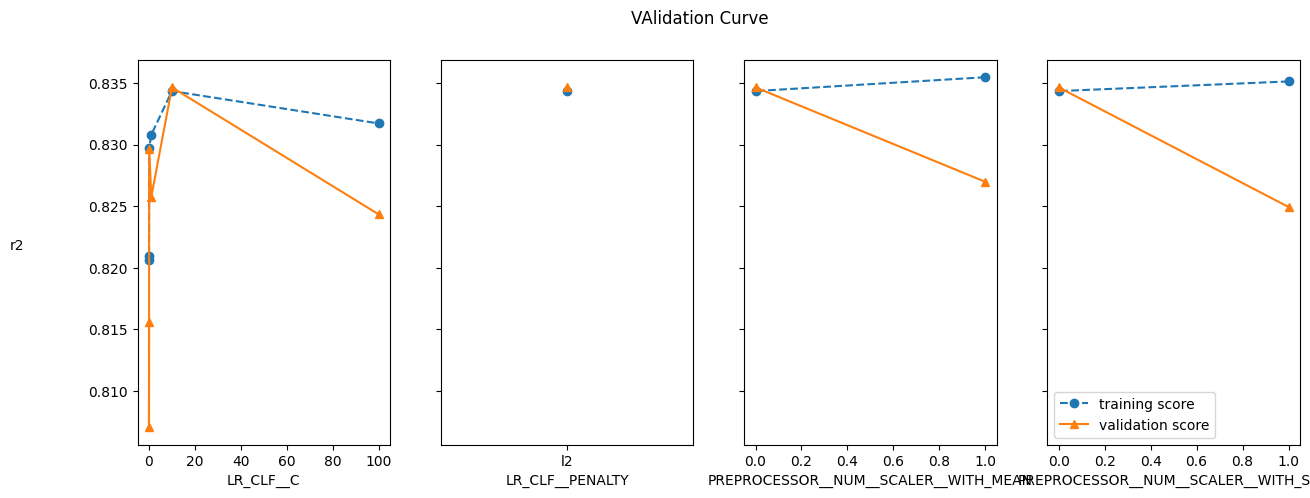

In [ ]:
## 튜닝결과 그래프 그리기
## 한글 인식


results = lr_gs.cv_results_
mean_train = results["mean_train_score"]
mean_test = results["mean_test_score"]

masks = []
masks_names = list(lr_gs.best_params_.keys())
masks_names

for p_k, p_v in lr_gs.best_params_.items():
    masks.append(list(results["param_"+p_k].data==p_v))

masks

params = lr_gs.param_grid

fig, ax = plt.subplots(1, len(params),
                      sharex ="none",
                      sharey = "all",
                      figsize= (15, 5))
fig.suptitle("VAlidation Curve")
fig.text(0.04, 0.5, "r2")

for i, p in enumerate(masks_names):
    m = np.stack(masks[:i]+masks[i+1:])
    ## 하이퍼파라미터값 1개일 때 변경
    # masks[i+1:]-> masks[i:]
    best_params_mask = m.all(axis=0)
    best_index = np.where(best_params_mask)
    x = np.array(params[p])
    y_1 = np.array(mean_train[best_index])      # 파라미터1개 경우 mean_train[best_index]-> mean_train
    y_2 = np.array(mean_test[best_index])        # 파라미터1개 경우  mean_test[best_index]-> mean_test
    ax[i].errorbar(x, y_1, linestyle="--", marker="o", label = "training score")    # ax[i]-> ax
    ax[i].errorbar(x, y_2, linestyle="-", marker="^", label = "validation score")
    ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()

### 8.3 베스트 모델 설정

In [ ]:
# 베스트 모델 파라미터 확인

print(lr_gs.best_score_)

print(lr_gs.best_params_)

0.8346513409961686
{'lr_clf__C': 10, 'lr_clf__penalty': 'l2', 'preprocessor__num__scaler__with_mean': False, 'preprocessor__num__scaler__with_std': False}


In [ ]:
best_clf = lr_gs.best_estimator_
best_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.75)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False,
                                                                                  with_std=False))]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('lr_clf', LogisticRegression(C=10))])

###8.4. 중요변수 확인

In [ ]:
best_clf["lr_clf"].coef_

array([[-1.37221953e-01, -4.12527976e-02,  1.85093275e-02,
        -2.05706563e-03,  7.52287791e-04, -8.94019396e-02,
        -1.42325853e+00, -1.70224208e-02]])

In [ ]:
# 중요도 점수
features = best_clf["preprocessor"].get_feature_names_out()
importances = best_clf["lr_clf"].coef_
importanes = importances.flatten()
output = pd.DataFrame([features, importances],
                      index = ["features", "importances"]).T
output = output.sort_values(["importances"], ascending=False)
output

,features,importances
0,num__Pregnancies,"[-0.13722195275120735, -0.04125279763327823, 0..."
1,num__Glucose,None
2,num__BloodPressure,None
3,num__SkinThickness,None
4,num__Insulin,None
5,num__BMI,None
6,num__DiabetesPedigreeFunction,None
7,num__Age,None


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

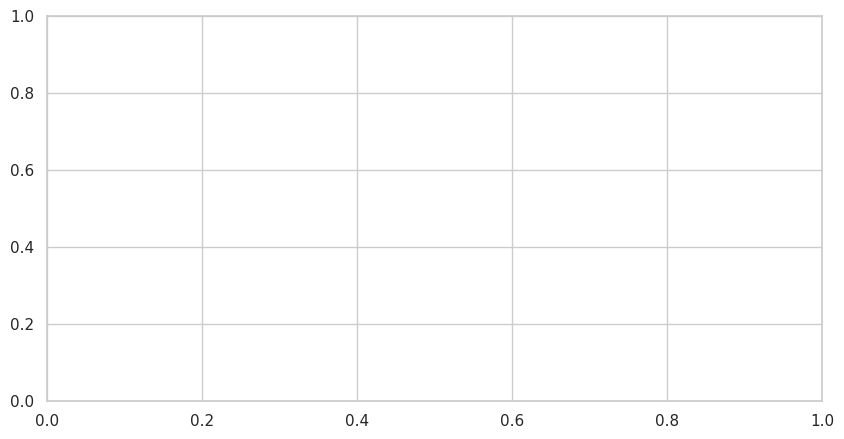

In [ ]:
##그래프 출력
#plt.rc("font", family="NanumBarunGothic")
#plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale =1)
ax = sns.barplot( y= "features", x="importances", data = output)
plt.show()

## 9. 모델 test 및 검정

### 9. 1. 검증용데이터 예측



*   predict(실제값)
*   predict_proba(확률값)



In [ ]:
y_pred = best_clf.predict_proba(X_test)
y_pred

array([[3.99780168e-01, 6.00219832e-01],
       [4.67805533e-02, 9.53219447e-01],
       [6.43837731e-01, 3.56162269e-01],
       [9.36509531e-01, 6.34904691e-02],
       [1.50475685e-01, 8.49524315e-01],
       [1.98986837e-01, 8.01013163e-01],
       [9.75816490e-01, 2.41835098e-02],
       [6.94564437e-02, 9.30543556e-01],
       [1.10952658e-01, 8.89047342e-01],
       [8.13747999e-02, 9.18625200e-01],
       [9.41870912e-01, 5.81290875e-02],
       [4.09038683e-02, 9.59096132e-01],
       [2.02950933e-01, 7.97049067e-01],
       [1.31983458e-02, 9.86801654e-01],
       [4.19101377e-01, 5.80898623e-01],
       [4.70352308e-01, 5.29647692e-01],
       [9.93580785e-01, 6.41921481e-03],
       [7.84868116e-02, 9.21513188e-01],
       [1.18602300e-01, 8.81397700e-01],
       [1.26927547e-01, 8.73072453e-01],
       [8.15132062e-01, 1.84867938e-01],
       [9.66800851e-01, 3.31991493e-02],
       [2.84187129e-01, 7.15812871e-01],
       [2.52394600e-01, 7.47605400e-01],
       [6.464754

In [ ]:
#### 검증데이터 예측

y_pred = best_clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])

### 9. 2. 정오분류표 검정

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels= best_clf.classes_)
cm

array([[ 43,  26],
       [ 19, 108]])

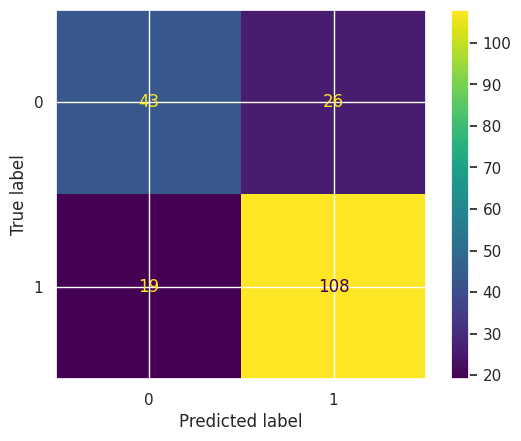

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = best_clf.classes_)
disp.plot()

### 9.3 모델 검정

In [ ]:
## 6.모델 검정
# 정오분류표, ROC,AUC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

MSE: 0.237
MAE: 0.361
RMSE: 0.486
R2: 0.803


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.62      0.66        69
           1       0.81      0.85      0.83       127

    accuracy                           0.77       196
   macro avg       0.75      0.74      0.74       196
weighted avg       0.77      0.77      0.77       196



In [ ]:
print("잘못 분류된 샘플 갯수: %d" % (y_test !=y_pred).sum())
print("roc_auc: %0.3f" % roc_auc_score(y_test, y_pred))
print("정확도:%0.3f" % precision_score(y_test, y_pred))
print("재현율:%0.3f" % recall_score(y_test, y_pred))
print("f1:%0.3f" % f1_score(y_test, y_pred))

잘못 분류된 샘플 갯수: 45
roc_auc: 0.737
정확도:0.806
재현율:0.850
f1:0.828


### 9.4 ROC커브 그리기

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, best_clf.predict_proba(X_test)[:,1])

In [ ]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.01449275, 0.01449275,
        0.02898551, 0.02898551, 0.04347826, 0.04347826, 0.05797101,
        0.05797101, 0.07246377, 0.07246377, 0.08695652, 0.08695652,
        0.10144928, 0.10144928, 0.13043478, 0.13043478, 0.14492754,
        0.14492754, 0.17391304, 0.17391304, 0.1884058 , 0.1884058 ,
        0.20289855, 0.20289855, 0.2173913 , 0.2173913 , 0.23188406,
        0.23188406, 0.24637681, 0.24637681, 0.36231884, 0.36231884,
        0.37681159, 0.37681159, 0.39130435, 0.39130435, 0.42028986,
        0.42028986, 0.47826087, 0.47826087, 0.49275362, 0.49275362,
        0.50724638, 0.50724638, 0.56521739, 0.56521739, 0.62318841,
        0.62318841, 0.69565217, 0.69565217, 0.72463768, 0.72463768,
        0.92753623, 0.92753623, 1.        , 1.        ]),
 array([0.        , 0.00787402, 0.01574803, 0.01574803, 0.03149606,
        0.03149606, 0.37795276, 0.37795276, 0.43307087, 0.43307087,
        0.49606299, 0.49606299, 0.52755906, 0.52755906, 0.

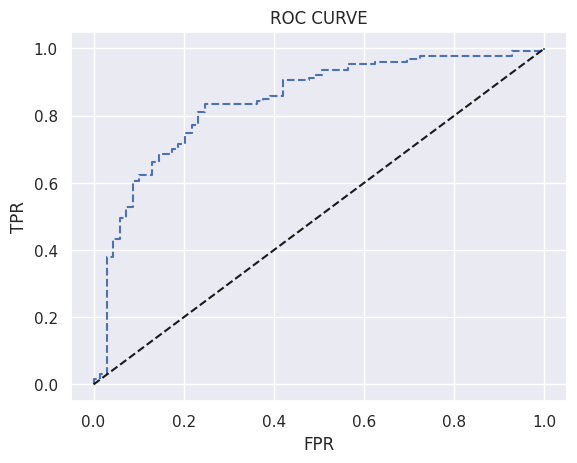

In [ ]:
plt.plot(fpr, tpr, "--", label= "Logistic Regression")
plt.plot([0,1], [0,1], "k--")
plt.plot([fpr], [tpr], "r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

### 9.5 gain 및 lift chart

In [ ]:
pip install scikit-plot

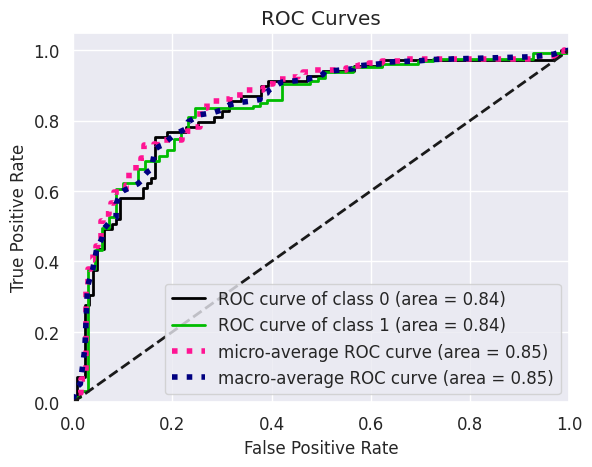

In [ ]:
# ROC_AUC
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, best_clf.predict_proba(X_test))
plt.show()

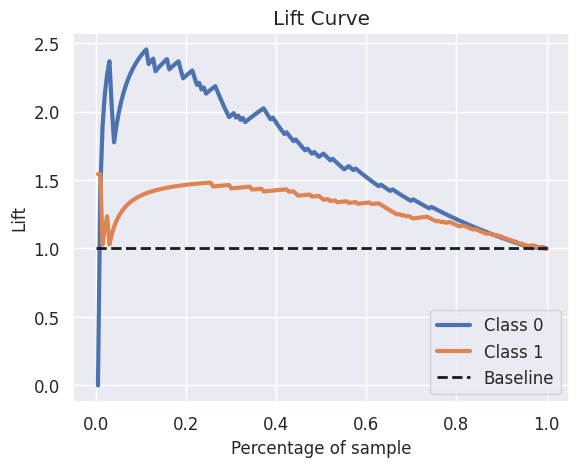

In [ ]:
# lft chart
skplt.metrics.plot_lift_curve(y_test, best_clf.predict_proba(X_test))
plt.show()

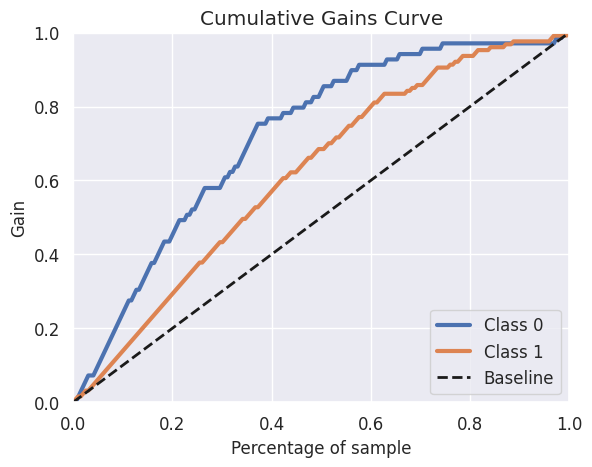

In [ ]:
# gain_chart
skplt.metrics.plot_cumulative_gain(y_test, best_clf.predict_proba(X_test))
plt.show()

## 10. 예측값 저장

In [ ]:
y_pred = best_clf.predict(y_test)
y_pred

ValueError: X does not contain any features, but ColumnTransformer is expecting 8 features

In [ ]:
submission.head()

,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


In [ ]:
y_pred = best_clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0])